In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../input/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

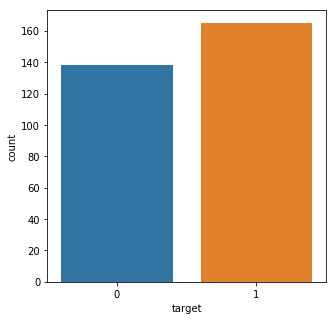

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='target',data=df)

Text(0, 0.5, 'Frequency')

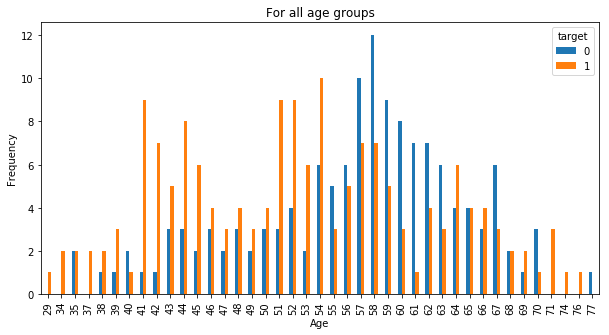

In [9]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(10,5))
plt.title('For all age groups')
plt.xlabel('Age')
plt.ylabel('Frequency')

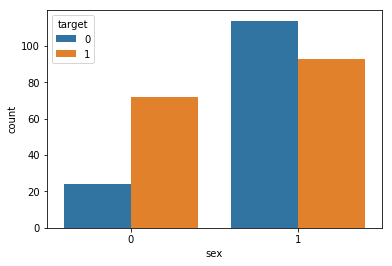

In [10]:
sns.countplot(x='sex',data=df,hue='target')

In [11]:
countFemale= len(df[df['sex']==0])
countMale = len(df[df['sex']==1])
l=len(df['sex'])
print('Percentage of male patients is {:.2f}'.format((countMale/l)*100))
print('Percentage of Female patients is {:.2f}'.format((countFemale/l)*100))

Percentage of male patients is 68.32
Percentage of Female patients is 31.68


Text(0, 0.5, 'data')

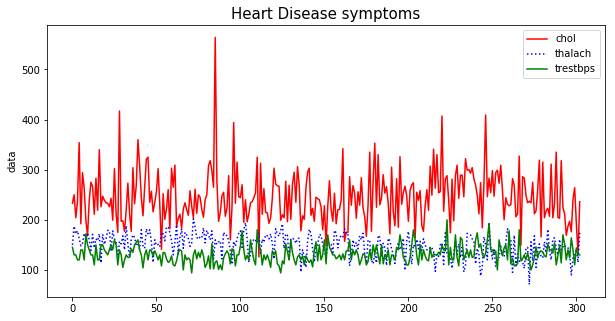

In [12]:
plt.figure(figsize=(10,5))
df['chol'].plot(kind='line',color='red',label='chol')
df['thalach'].plot(kind='line',color='blue',label='thalach',linestyle=':')
df['trestbps'].plot(kind='line',color='green',label='trestbps')
plt.legend()
plt.title('Heart Disease symptoms',fontsize=15)
plt.ylabel('data')


Text(0.5, 0, 'The Slope of The Peak Exercise ST Segment ')

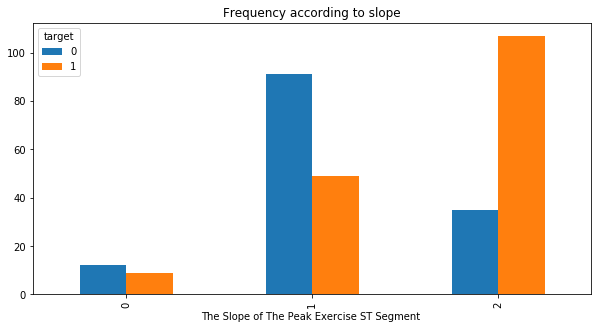

In [13]:
pd.crosstab(df['slope'],df['target']).plot(kind='bar',figsize=(10,5))
plt.title('Frequency according to slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')



Text(0.5, 0, 'Fasting Blood sugar (1:True,0:False)')

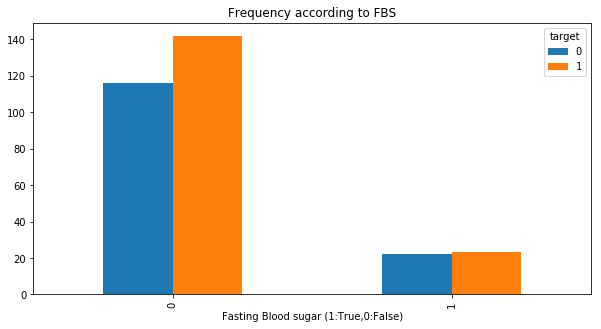

In [14]:
pd.crosstab(df['fbs'],df['target']).plot(kind='bar',figsize=(10,5))
plt.title('Frequency according to FBS')
plt.xlabel('Fasting Blood sugar (1:True,0:False)')


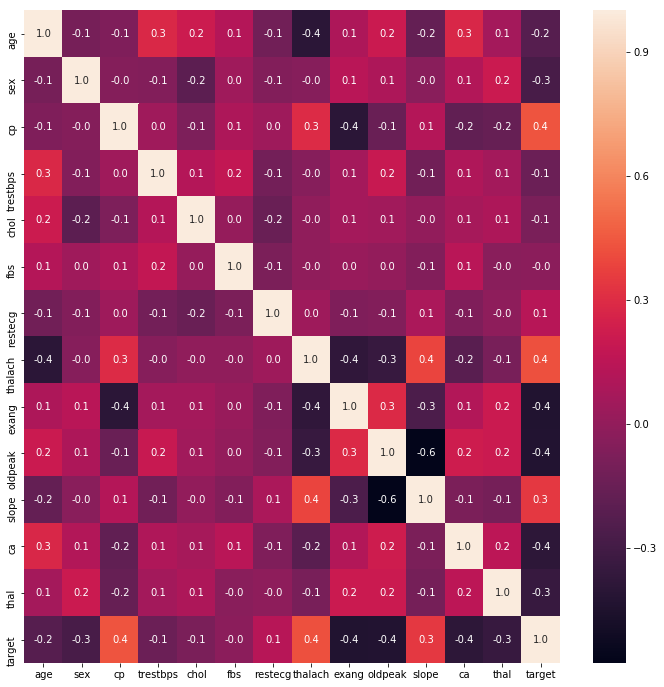

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.1f')


In [16]:
cp =pd.get_dummies(df['cp'],prefix='cp')
thal=pd.get_dummies(df['thal'],prefix='thal')
slope = pd.get_dummies(df['slope'],prefix='slope')

In [17]:
train =pd.concat([df,cp,thal,slope],axis=1)


In [18]:
train=train.drop(['cp','thal','slope'],axis=1)

In [19]:
y=train['target']
X=train.drop(['target'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
tpot=TPOTClassifier(generations=10,population_size=100,verbosity=2)
tpot.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.8392857142857142
Generation 2 - Current best internal CV score: 0.8392857142857142
Generation 3 - Current best internal CV score: 0.8394557823129253
Generation 4 - Current best internal CV score: 0.8394557823129253
Generation 5 - Current best internal CV score: 0.8436224489795918
Generation 6 - Current best internal CV score: 0.8436224489795918
Generation 7 - Current best internal CV score: 0.8436224489795918
Generation 8 - Current best internal CV score: 0.8436224489795918
Generation 9 - Current best internal CV score: 0.8436224489795918
Generation 10 - Current best internal CV score: 0.847534013605442

Best pipeline: BernoulliNB(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.1, min_samples_leaf=19, min_samples_split=14, n_estimators=100), alpha=100.0, fit_prior=True)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [23]:
tpot.score(X_test,y_test)

0.9016393442622951